In [1]:
# Team 1
# https://github.com/andrew-antoniuk/DiscreteMath_Lab1

In [2]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# Task 1. Algorithm's analysis

In [3]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

### Generating graph

In [4]:

# You can use this function to generate a random graph with 'num_of_nodes'
# nodes and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G

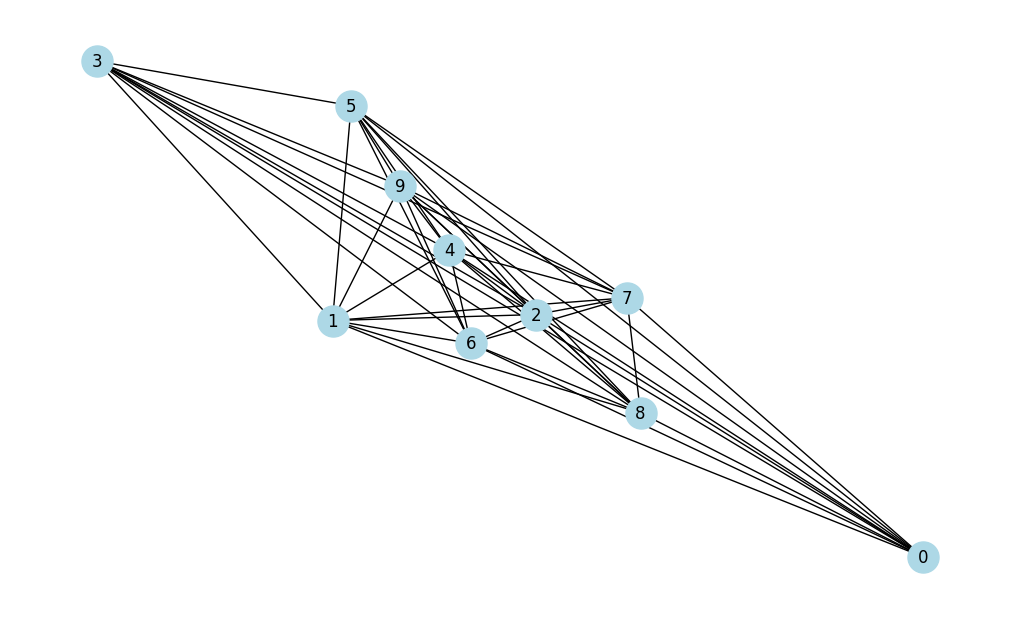

In [5]:
G = gnp_random_connected_graph(10, 1, False, True)
# G.edges(data=True)._adjdict

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

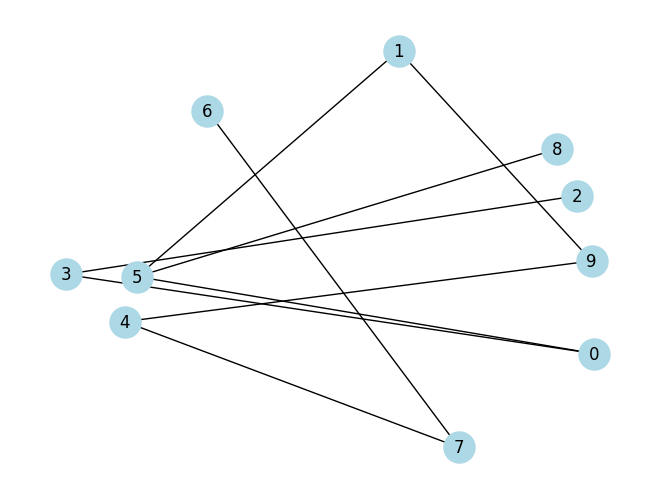

In [7]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 3), (0, 5), (1, 5), (1, 9), (2, 3), (4, 9), (4, 7), (5, 8), (6, 7)]),
 9)

#### Your implementation

In [9]:
def kruskal_algorithm(graph: dict[str, dict[str, int]]) -> dict[str, dict[str, int]]:
    edges = [(u, v, w) for u in graph for v, w in graph[u].items() if u < v]
    edges.sort(key=lambda x: x[2])

    f = [{n} for n in graph]
    tree = {n: {} for n in graph}

    for u, v, w in edges:
        u_it = next(c for c in f if u in c)
        v_it = next(c for c in f if v in c)

        if u_it != v_it:
            tree[u][v] = w
            tree[v][u] = w

            u_it.update(v_it)
            f.remove(v_it)

        if len(f) == 1:
            return tree

    return tree

def kruskal_algorithm_dsu(graph: dict[str, dict[str, int]]) -> dict[str, dict[str, int]]:

    """
    Kruskal's Algorithm for finding minimum spanning tree of given weighted graph.
    The main concept of this algorithm is to choose edge with the least possible weight
    at each step in the whole graph, so that no cycle can be formed,
    and repeat thos process until no unvisited nodes left.
    Works only for similar graph representation below:

    g = {
    'A': {'B': 4, 'C': 2, 'D': 3},
    'B': {'A': 4},
    'C': {'A': 2, 'D': 2},
    'D': {'A': 3, 'C': 2, 'D': 3},
    }
    """

    p = {v: v for v in graph}

    def find(v):
        while p[v] != v:
            v = p[v]
        return v

    def union(a, b):
        ra = find(a)
        rb = find(b)
        if ra == rb:
            return False
        p[rb] = ra
        return True

    edges = sorted(
        (w, u, v)
        for u in graph
        for v, w in graph[u].items()
        if u < v
    )

    tree = {v: {} for v in graph}

    for w, u, v in edges:
        if union(u, v):
            tree[u][v] = w
            tree[v][u] = w

    return tree

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

### Prim's algorithm

#### nx implementation

In [10]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

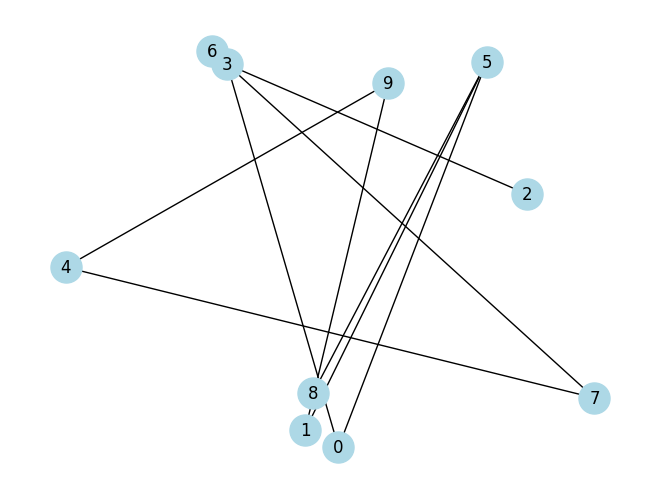

In [11]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [12]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 3), (0, 5), (1, 5), (1, 9), (2, 3), (4, 9), (4, 7), (5, 8), (6, 7)]),
 9)

#### Your implementation

In [ ]:
def prim_algorithm(graph: dict[str, dict[str, int]]) -> dict[str, dict[str, int]]:
    # choose min-weight edge (w, v, u)
    w0, v0, u0 = min(
        (w, v, u)
        for u in graph
        for v, w in graph[u].items()
    )

    l = len(graph)
    visited = {u0, v0}

    tree = {v: {} for v in graph}
    tree[u0][v0] = w0
    tree[v0][u0] = w0

    while len(visited) < l:
        w, u, v = min(
            (w, u, v)
            for u in visited
            for v, w in graph[u].items()
            if v not in visited
        )

        tree[u][v] = w
        tree[v][u] = w
        visited.add(v)

    return tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

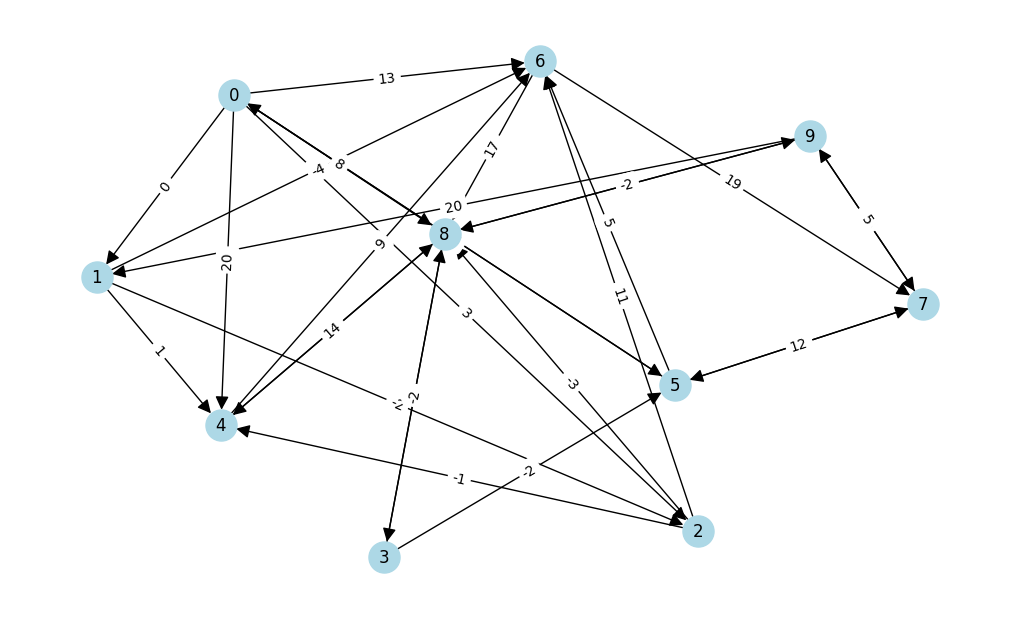

In [14]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [15]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Negative cycle detected


#### Your implementation

In [16]:
INF = 10**9

def bellman_ford(n, edges, start):

    """
    n      — кількість вершин (0..n-1)
    edges  — список ребер (u, v, w) для u -> v з вагою w
    start  — стартова вершина

    Повертає: (dist, parent, has_negative_cycle)
    """

    dist = [INF] * n
    parent = [-1] * n
    dist[start] = 0

    for _ in range(n - 1):
        updated = False
        for u, v, w in edges:
            if dist[u] != INF and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                parent[v] = u
                updated = True
        if not updated:
            break

    has_negative_cycle = False
    for u, v, w in edges:
        if dist[u] != INF and dist[u] + w < dist[v]:
            has_negative_cycle = True
            break

    return dist, parent, has_negative_cycle


def get_path(parent, start, end):

    """
    Docstring for get_path

    :param parent: Description
    :param start: Description
    :param end: Description
    """

    path = []
    cur = end
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    path.reverse()

    if path[0] == start:
        return path
    return None


### Floyd-Warshall algorithm

#### nx implementation

In [17]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: -12, 1: -12, 2: -14, 4: -15, 5: -18, 6: -16, 8: -17, 3: -16, 7: -7, 9: -24}
Distances with 1 source: {1: -12, 2: -14, 4: -15, 6: -16, 0: -12, 3: -16, 5: -18, 7: -7, 8: -17, 9: -24}
Distances with 2 source: {2: -12, 4: -13, 6: -14, 8: -15, 0: -10, 1: -10, 3: -14, 5: -16, 7: -5, 9: -22}
Distances with 3 source: {3: -12, 5: -14, 8: -13, 0: -8, 1: -8, 2: -10, 4: -11, 6: -12, 7: -3, 9: -20}
Distances with 4 source: {4: -3, 6: -4, 8: -5, 0: 0, 1: 0, 2: -2, 3: -4, 5: -6, 7: 5, 9: -12}
Distances with 5 source: {5: -12, 0: -6, 6: -10, 7: -1, 1: -6, 2: -8, 3: -10, 4: -9, 8: -11, 9: -18}
Distances with 6 source: {6: 0, 7: 15, 8: 5, 0: 10, 1: 10, 2: 8, 3: 6, 4: 7, 5: 4, 9: -2}
Distances with 7 source: {7: 0, 5: 0, 9: -6, 0: 6, 1: 6, 2: 4, 3: 2, 4: 3, 6: 2, 8: 1}
Distances with 8 source: {8: -15, 3: -14, 4: -13, 9: -22, 0: -10, 1: -10, 2: -12, 5: -16, 6: -14, 7: -5}
Distances with 9 source: {9: -30, 1: -18, 7: -13, 8: -23, 0: -18, 2: -20, 3: -22, 4: -21, 5: -24, 6: -22}

#### Your implementation

In [18]:
INF = 10**9

def print_matrix(matrix, k):

    """
    Docstring for print_matrix

    :param matrix: Description
    :param k: Description
    """

    print(f"\nW^{k}:")
    for row in matrix:
        for val in row:
            if val == INF:
                print("∞".rjust(4), end=" ")
            else:
                print(str(val).rjust(4), end=" ")
        print()


def floyd_warshall(graph):


    """
    Docstring for floyd_warshall

    :param graph: Description
    """

    n = len(graph)
    dist = [row[:] for row in graph]

    # print("Початкова матриця:")
    # print_matrix(dist, 0)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

        # print_matrix(dist, k + 1)

    return dist


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Useful explanations

### How to get list of edges for your algorithm

In [19]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [20]:
edges[:5]

[(0, 1), (0, 2), (0, 4), (0, 5), (0, 6)]

### To get edges with weights

In [21]:
edges = list(G.edges(data=True))

In [22]:
edges[:5]

[(0, 1, {'weight': 0}),
 (0, 2, {'weight': 3}),
 (0, 4, {'weight': 20}),
 (0, 5, {'weight': -3}),
 (0, 6, {'weight': 13})]

In [23]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [24]:
import time
from tqdm import tqdm

In [25]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:06<00:00, 158.32it/s]


0.0018656017780303955

In [ ]:
x = [5, 10, 20, 50, 100]
d = (gnp_random_connected_graph(i, 0.7) for i in x)
d_bf = [gnp_random_connected_graph(n, 0.4, directed = True) for n in x]


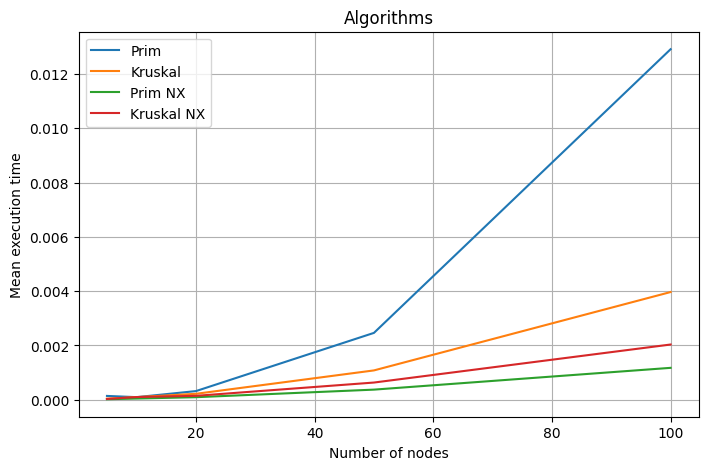

In [ ]:
INF = float("inf")

def nx_to_warshall(G):
    n = G.number_of_nodes()

    matrix = [[INF] * n for _ in range(n)]

    for i in range(n):
        matrix[i][i] = 0

    if G.is_directed():
        for u, v, data in G.edges(data=True):
            weight = data.get("weight", 1)
            matrix[u][v] = weight
    else:
        for u, v, data in G.edges(data=True):
            weight = data.get("weight", 1)
            matrix[u][v] = weight
            matrix[v][u] = weight

    return matrix


def nx_to_bellman(G):

    n = G.number_of_nodes()
    edges = []

    if G.is_directed():
        for u, v, data in G.edges(data=True):
            weight = data.get("weight", 1)
            edges.append((u, v, weight))
    else:
        for u, v, data in G.edges(data=True):
            weight = data.get("weight", 1)
            edges.append((u, v, weight))
            edges.append((v, u, weight))

    return n, edges

def nx_to_prim_kruskal(G):

    return {
        u: {v: G[u][v]['weight'] for v in G.neighbors(u)}
        for u in G.nodes()
    }

def run_fw(G):
    M = nx_to_warshall(G)
    floyd_warshall(M)

def run_bf(G):
    n, edges = nx_to_bellman(G)
    bellman_ford(n, edges, start = 0)

def run_prim(G):
    H = nx.convert_node_labels_to_integers(G, first_label=0)
    prim_algorithm(nx_to_prim_kruskal(H))

def run_kruskal(G):
    H = nx.convert_node_labels_to_integers(G, first_label=0)
    kruskal_algorithm(nx_to_prim_kruskal(H))

def run_nx_fw(G):
    nx.floyd_warshall(G)

def run_kruskal_nx(G):
    nx.minimum_spanning_tree(G, algorithm = "kruskal")

def run_prim_nx(G):
    nx.minimum_spanning_tree(G, algorithm = "prim")

def run(func, grapher, runs = 1000):
    v = []
    for _ in range(runs):
        start = time.time()
        func(grapher())
        end = time.time()
        v.append(end - start)
    return sum(v) / runs

def small_run(func, data, t_func = None):

    r = []
    for y in data:

        if not t_func is None:
            y = t_func(y)

        start = time.time()
        func(y)
        end = time.time()
        r.append(end - start)
    return r


r = {
    "FW": [],
    "Prim": [],
    "Kruskal": [],
    "Kruskal_NX": [],
    "Prim_NX": [],
    "FW_NX": [],
    "BF": [],
}

for n in x:
    G = gnp_random_connected_graph(n, 0.4)

    r["FW"].append(run(lambda _: run_fw(_), lambda: G, runs = 3))
    r["FW_NX"].append(run(lambda _: run_nx_fw(_), lambda: G, runs = 3))
    r["BF"].append(run(lambda _: run_bf(_), lambda: G, runs = 3))

    r["Prim"].append(run(lambda _: run_prim(_), lambda: G, runs = 3))
    r["Kruskal"].append(run(lambda _: run_kruskal(_), lambda: G, runs = 3))
    r["Kruskal_NX"].append(run(lambda _: run_kruskal_nx(_), lambda: G, runs = 10))
    r["Prim_NX"].append(run(lambda _: run_prim_nx(_), lambda: G, runs = 10))

plt.figure(figsize=(8, 5))

plt.plot(x, r["Prim"], label = "Prim")
plt.plot(x, r["Kruskal"], label = "Kruskal")
plt.plot(x, r["Prim_NX"], label = "Prim NX")
plt.plot(x, r["Kruskal_NX"], label = "Kruskal NX")

# plt.plot(x, r["FW"], label="Floyd–Warshall")
# plt.plot(x, r["BF"], label="Bellman-Ford")
# plt.plot(x, r["FW_NX"], label="Floyd–Warshall NX")

plt.xlabel("Number of nodes")
plt.ylabel("Mean execution time")
plt.title("Algorithms")
plt.legend()
plt.grid(True)
plt.show()

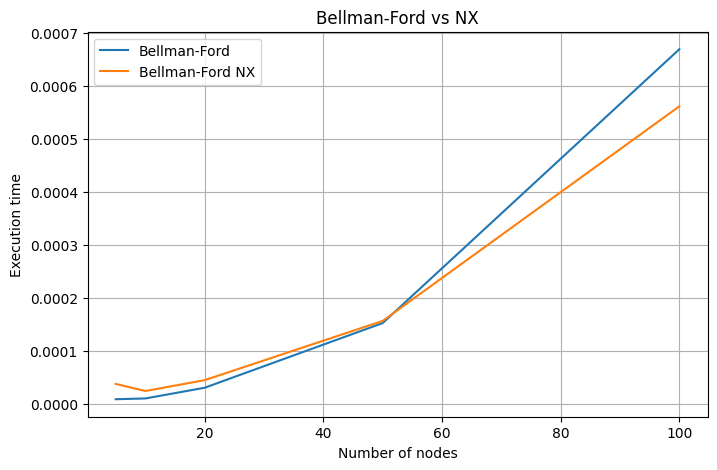

In [28]:
for G in d_bf:
    for u, v, data in G.edges(data=True):
        data["weight"] = random.randint(1, 20)

bf_inputs = [nx_to_bellman(G) for G in d_bf]

def run_bf_tuple(t):
    n, edges = t
    bellman_ford(n, edges, start=0)

def run_bf_nx(G):
    bellman_ford_predecessor_and_distance(G, 0, weight = "weight")

plt.figure(figsize=(8, 5))
plt.plot(x, small_run(run_bf_tuple, bf_inputs), label = "Bellman-Ford")
plt.plot(x, small_run(run_bf_nx, d_bf), label = "Bellman-Ford NX")
plt.xlabel("Number of nodes")
plt.ylabel("Execution time")
plt.title("Bellman-Ford vs NX")
plt.legend()
plt.grid(True)
plt.show()


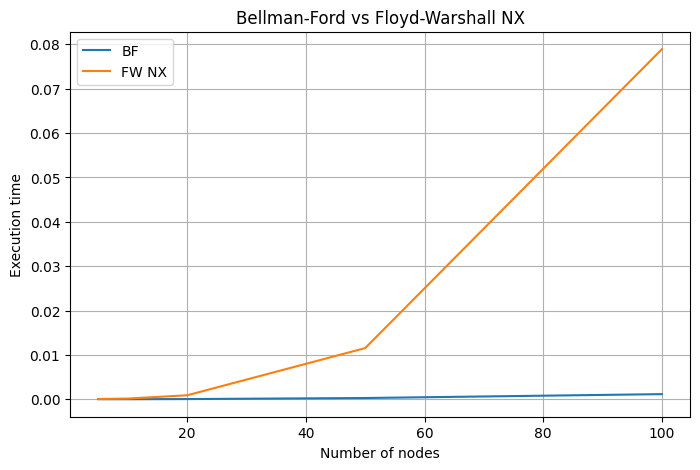

In [29]:
d_fw = [gnp_random_connected_graph(n, 0.4, directed=False) for n in x]

for G in d_fw:
    for u, v, data in G.edges(data=True):
        data["weight"] = abs(data.get("weight", 1))

plt.figure(figsize=(8, 5))

plt.plot(x, small_run(run_bf, d_bf), label = "BF")
plt.plot(x, small_run(run_nx_fw, d_fw), label = "FW NX")

plt.xlabel("Number of nodes")
plt.ylabel("Execution time")
plt.title("Bellman-Ford vs Floyd-Warshall NX")
plt.legend()
plt.grid(True)
plt.show()


# Task 2. Decision Tree Classifier

In [30]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://medium.com/data-science/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [ ]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [ ]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

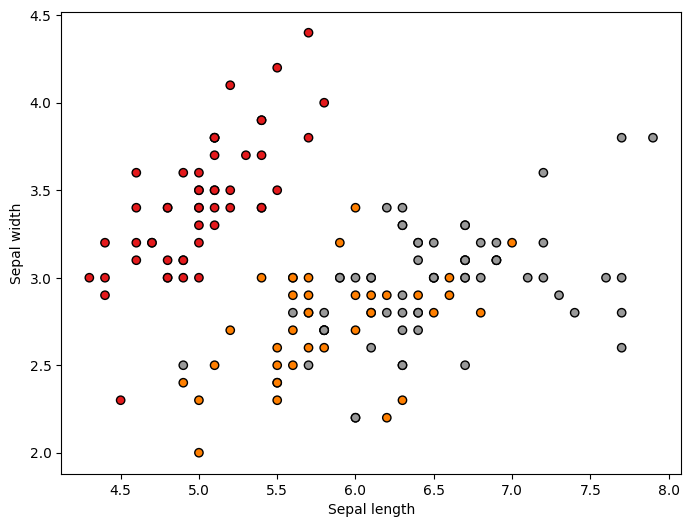

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
t = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
clf = DecisionTreeClassifier()

X, t = iris.data, iris.target
X.shape, t.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [ ]:
X, X_test, t, y_test = train_test_split(X, t, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [ ]:
clf = clf.fit(X, t)

import networkx as nx
import matplotlib.pyplot as plt

def draw_my_tree(clf, max_nodes = 200):

    """
    Docstring for draw_my_tree

    :param clf: Description
    :param max_nodes: Description
    """

    G = nx.DiGraph()
    node_id = 0

    def add(node, parent=None, edge_label = ""):
        nonlocal node_id
        if node is None:
            return None

        if node_id >= max_nodes:
            return None

        cur = node_id
        node_id += 1

        is_leaf = (node.left is None and node.right is None)
        if is_leaf:
            proba_txt = ""
            if getattr(node, "proba", None) is not None:
                proba_txt = "\\nproba=" + str([round(float(p), 3) for p in node.proba])
            label = f"Leaf\\nclass={node.predicted_class}{proba_txt}"
        else:
            label = f"X[{node.feature_index}] <= {node.threshold:.3f}"

        G.add_node(cur, label=label)

        if parent is not None:
            G.add_edge(parent, cur, label=edge_label)

        left_id = add(node.left, cur, "True")
        right_id = add(node.right, cur, "False")
        return cur

    add(clf.tree)

    # positions
    try:
        from networkx.drawing.nx_agraph import graphviz_layout
        pos = graphviz_layout(G, prog = "dot")
    except Exception:
        pos = nx.spring_layout(G, seed = 42)

    labels = nx.get_node_attributes(G, "label")
    edge_labels = nx.get_edge_attributes(G, "label")

    plt.figure(figsize=(14, 8))
    nx.draw(G, pos, with_labels=False, arrows=True, node_size=1800)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Decision Tree Custom")
    plt.axis("off")
    plt.show()

### Visualization of produced tree

You do not need to understand this piece of code :)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

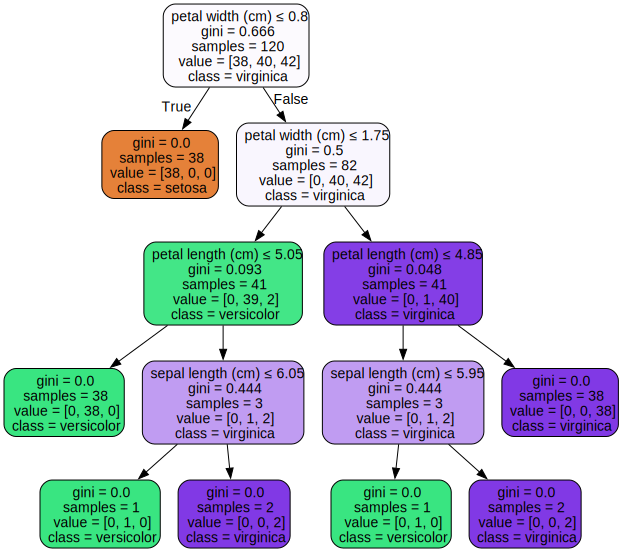

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [ ]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [ ]:
sum(predictions == y_test) / len(y_test)

np.float64(0.9333333333333333)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [ ]:
y_test

array([1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 2, 0, 0])


Here you can traverse the tree above by yourself and make sure that prediction works

In [ ]:
X_test[1]

array([5.2, 3.5, 1.5, 0.2])

In [ ]:
clf.predict([X_test[1]])

array([0])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Decision tree classifier (2 point)

###  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$


### Remarks


- We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.

In [ ]:

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):

        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """

        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.predicted_class = None
        self.proba = None

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int, laplace_alpha: float = 0.5) -> None:
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None
        self.laplace_alpha = laplace_alpha


    def fit(self, X: npt.NDArray, y: npt.NDArray) -> None:

        """
        Basically, function that performs all the training (building of a tree)
        We recommend to use it as a wrapper of recursive building function
        """

        self.number_of_classes = np.unique(y).size
        self.tree = self._build(X, y, depth=0)


    def _gini(self, y: npt.NDArray) -> float:

        """
        Docstring for _gini

        :param self: Description
        :param y: Description
        :type y: npt.NDArray
        :return: Description
        :rtype: float
        """

        if y.size == 0:
            return 0.0
        counts = np.bincount(y, minlength=self.number_of_classes)
        p = counts / y.size
        return 1.0 - np.sum(p * p)

    def _leaf_proba_laplace(self, y: npt.NDArray) -> npt.NDArray:

        """
        Laplace smoothing:
        proba_k = (count_k + a) / (N + a*K)
        """

        counts = np.bincount(y, minlength=self.number_of_classes).astype(float)
        N = float(y.size)
        K = float(self.number_of_classes)
        a = float(self.laplace_alpha)
        return (counts + a) / (N + a * K)

    def _best_split(self, X: npt.NDArray, y: npt.NDArray):

        """
        Docstring for _best_split

        :param self: Description
        :param X: Description
        :type X: npt.NDArray
        :param y: Description
        :type y: npt.NDArray
        """

        m, n = X.shape
        if m <= 1:
            return None, None, None

        parent_gini = self._gini(y)
        best_gini = parent_gini
        best_feature = None
        best_threshold = None

        for j in range(n):
            xj = X[:, j]
            order = np.argsort(xj)
            x_sorted = xj[order]
            y_sorted = y[order]

            for i in range(1, m):
                if x_sorted[i] == x_sorted[i - 1]:
                    continue

                thr = (x_sorted[i] + x_sorted[i - 1]) / 2.0
                y_left = y_sorted[:i]
                y_right = y_sorted[i:]

                g = (y_left.size / m) * self._gini(y_left) + (y_right.size / m) * self._gini(y_right)

                if g < best_gini:
                    best_gini = g
                    best_feature = j
                    best_threshold = thr

        return best_feature, best_threshold, best_gini

    def _build(self, X: npt.NDArray, y: npt.NDArray, depth: int) -> Node:

        """
        Docstring for _build

        :param self: Description
        :param X: Description
        :type X: npt.NDArray
        :param y: Description
        :type y: npt.NDArray
        :param depth: Description
        :type depth: int
        :return: Description
        :rtype: Node
        """

        node = Node(X, y)

        node.proba = self._leaf_proba_laplace(y)
        node.predicted_class = int(np.argmax(node.proba))

        # stop conditions
        if depth >= self.max_depth:
            return node

        if np.unique(y).size == 1:
            return node

        feat, thr, _ = self._best_split(X, y)

        if feat is None:
            return node

        mask_left = X[:, feat] <= thr
        mask_right = ~mask_left

        if mask_left.sum() == 0 or mask_right.sum() == 0:
            return node

        node.feature_index = int(feat)
        node.threshold = float(thr)
        node.left = self._build(X[mask_left], y[mask_left], depth + 1)
        node.right = self._build(X[mask_right], y[mask_right], depth + 1)
        return node

    def _predict_one_node(self, x: npt.NDArray) -> Node:

        """
        Docstring for _predict_one_node

        :param self: Description
        :param x: Description
        :type x: npt.NDArray
        :return: Description
        :rtype: Node
        """

        node = self.tree
        while node.left is not None and node.right is not None:
            if x[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

    def predict(self, X_test: npt.NDArray) -> list:

        """
        Traverse the tree while there is a child
        and return the predicted class for it
        """

        return [int(self._predict_one_node(x).predicted_class) for x in X_test]

    def predict_proba(self, X_test: npt.NDArray) -> npt.NDArray:

        """
        Docstring for predict_proba

        :param self: Description
        :param X_test: Description
        :type X_test: npt.NDArray
        :return: Description
        :rtype: NDArray
        """

        return np.array([self._predict_one_node(x).proba for x in X_test])

In [ ]:

def evaluate(X_test: list[list], y_test: list, model) -> float:

    """
    Returns accuracy of the model (ratio of right guesses to the number of samples)
    """

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    preds = np.array(model.predict(X_test))
    return float(np.mean(preds == y_test))

### Your implementation

acc: 1.0
proba example: [[0.01333333 0.97333333 0.01333333]
 [0.97590361 0.01204819 0.01204819]
 [0.01369863 0.04109589 0.94520548]]


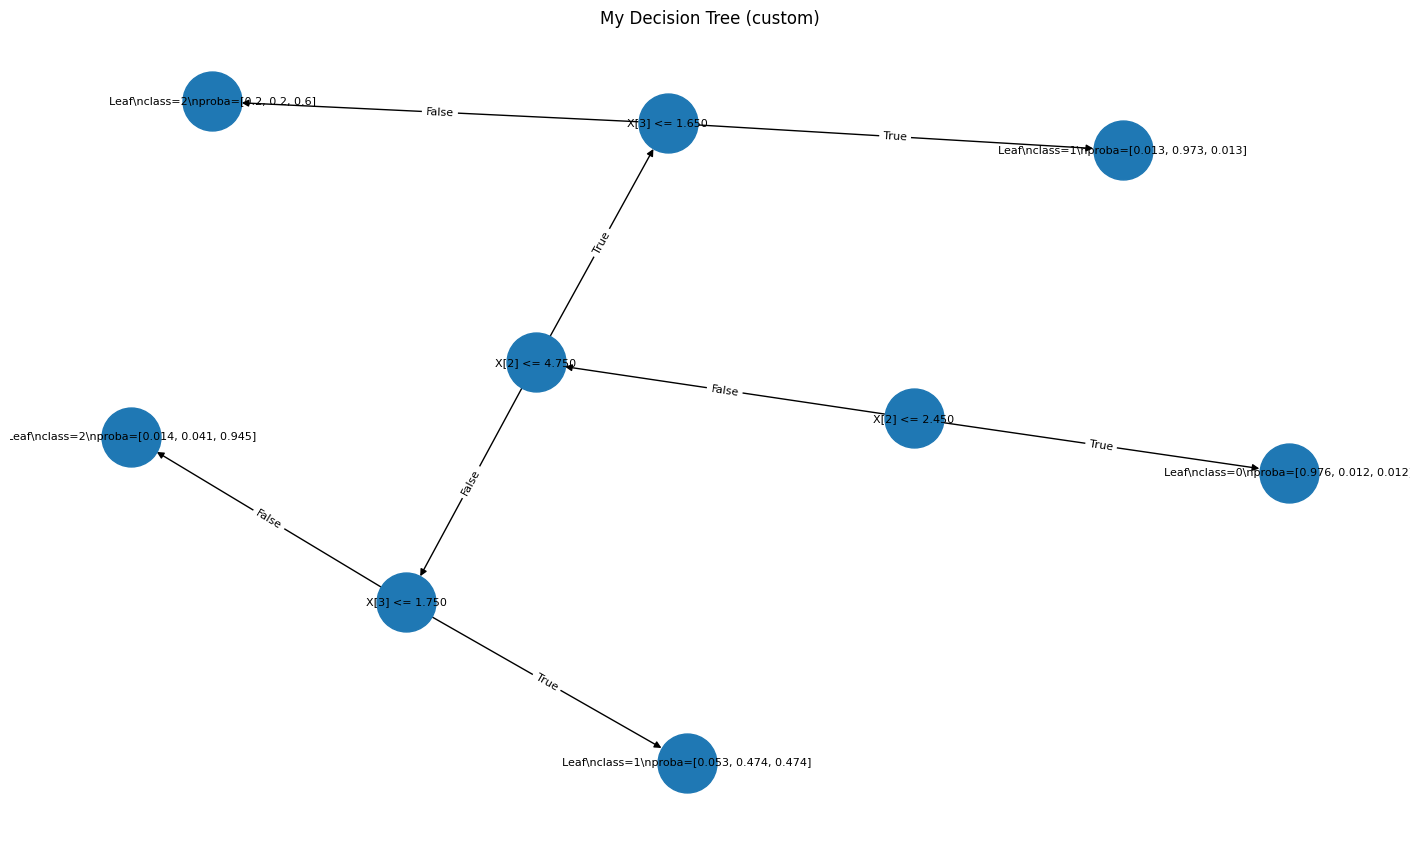

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, laplace_alpha=0.5)
clf.fit(X_train, y_train)

print("acc:", evaluate(X_test, y_test, clf))
print("proba example:", clf.predict_proba(X_test[:3]))

draw_my_tree(clf)

#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it